In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta

In [2]:
df = pd.read_csv('meal.csv')
df = df.dropna()

In [3]:
# removing this for now as linear regression can't be applied on datetime format
#df['DR1_020'] = pd.to_datetime(df['DR1_020'], unit='s').dt.time

In [4]:
oneparticipant = df[0:16][['DR1_020', 'DR1ICARB']].copy()
#oneparticipant = df[['DR1_020', 'DR1ICARB']].copy()

In [5]:
oneparticipant

,DR1_020,DR1ICARB
0,27000.0,5.397605e-79
1,27000.0,3.560000e+00
2,27000.0,2.320000e+00
3,28800.0,5.397605e-79
4,32400.0,4.088000e+01
5,32400.0,2.500000e-01
6,41400.0,1.740000e+00
7,45000.0,4.867000e+01
8,45000.0,1.170000e+00
9,45000.0,2.740000e+00


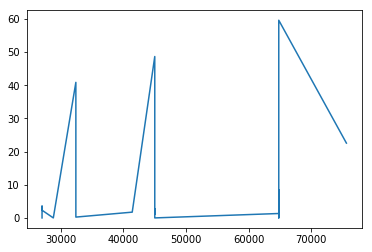

In [6]:
plt.plot(oneparticipant['DR1_020'], oneparticipant['DR1ICARB'])

In [7]:
#plt.scatter(oneparticipant['DR1_020'], oneparticipant['DR1ICARB'])

In [8]:
first_row = pd.DataFrame({'DR1_020': 0,
                        'DR1ICARB': 0}, index =[0]) 
oneparticipant = pd.concat([first_row, oneparticipant]).reset_index(drop = True) 
oneparticipant

,DR1_020,DR1ICARB
0,0.0,0.000000e+00
1,27000.0,5.397605e-79
2,27000.0,3.560000e+00
3,27000.0,2.320000e+00
4,28800.0,5.397605e-79
5,32400.0,4.088000e+01
6,32400.0,2.500000e-01
7,41400.0,1.740000e+00
8,45000.0,4.867000e+01
9,45000.0,1.170000e+00


In [9]:
oneparticipant = oneparticipant.append({'DR1_020': 0,
                                        'DR1ICARB': 0} , ignore_index=True)

In [10]:
oneparticipant

,DR1_020,DR1ICARB
0,0.0,0.000000e+00
1,27000.0,5.397605e-79
2,27000.0,3.560000e+00
3,27000.0,2.320000e+00
4,28800.0,5.397605e-79
5,32400.0,4.088000e+01
6,32400.0,2.500000e-01
7,41400.0,1.740000e+00
8,45000.0,4.867000e+01
9,45000.0,1.170000e+00


In [11]:
X = np.array(oneparticipant[0:(len(oneparticipant)-1)])

In [12]:
X

array([[0.00000000e+00, 0.00000000e+00],
       [2.70000000e+04, 5.39760535e-79],
       [2.70000000e+04, 3.56000000e+00],
       [2.70000000e+04, 2.32000000e+00],
       [2.88000000e+04, 5.39760535e-79],
       [3.24000000e+04, 4.08800000e+01],
       [3.24000000e+04, 2.50000000e-01],
       [4.14000000e+04, 1.74000000e+00],
       [4.50000000e+04, 4.86700000e+01],
       [4.50000000e+04, 1.17000000e+00],
       [4.50000000e+04, 2.74000000e+00],
       [4.50000000e+04, 5.39760535e-79],
       [6.48000000e+04, 1.33000000e+00],
       [6.48000000e+04, 8.46000000e+00],
       [6.48000000e+04, 5.39760535e-79],
       [6.48000000e+04, 5.96100000e+01],
       [7.56000000e+04, 2.25600000e+01]])

In [13]:
y = np.array(oneparticipant[1:(len(oneparticipant))])

In [14]:
y

array([[2.70000000e+04, 5.39760535e-79],
       [2.70000000e+04, 3.56000000e+00],
       [2.70000000e+04, 2.32000000e+00],
       [2.88000000e+04, 5.39760535e-79],
       [3.24000000e+04, 4.08800000e+01],
       [3.24000000e+04, 2.50000000e-01],
       [4.14000000e+04, 1.74000000e+00],
       [4.50000000e+04, 4.86700000e+01],
       [4.50000000e+04, 1.17000000e+00],
       [4.50000000e+04, 2.74000000e+00],
       [4.50000000e+04, 5.39760535e-79],
       [6.48000000e+04, 1.33000000e+00],
       [6.48000000e+04, 8.46000000e+00],
       [6.48000000e+04, 5.39760535e-79],
       [6.48000000e+04, 5.96100000e+01],
       [7.56000000e+04, 2.25600000e+01],
       [0.00000000e+00, 0.00000000e+00]])

In [15]:
print(X[0])

[0. 0.]


In [16]:
print(y[0])

[2.70000000e+04 5.39760535e-79]


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X,y)
#print(lr.score(X_train, y_train)*100)

In [18]:
lr.score(X,y)

0.1713281341858678